In [1]:
from scipy import misc
from scipy.signal import convolve2d
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
from skimage.transform import resize

In [3]:
image = imread('./images/06.jpg')
image.shape

(220, 220, 3)

(220, 220, 3)


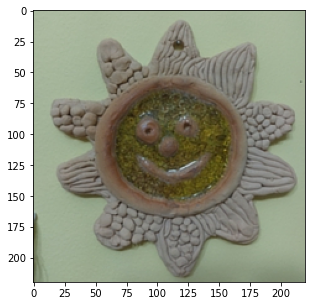

In [123]:
plt.figure(figsize=(5,5))

print(image.shape)
plt.imshow(image)
plt.show()

(220, 220)


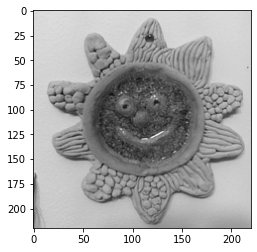

In [11]:
image_1c = np.dot(image, [0.299, 0.587, 0.114])

print(image_1c.shape)
plt.imshow(image_1c, cmap='gray')
plt.show()

In [20]:
img = np.random.randint(0,255, size=(10,10))
img

array([[155,  80,  30, 179, 172, 100, 203, 143, 170, 161],
       [143, 192,  86,  63,   1, 147, 226,  95, 131,  29],
       [ 70, 194,  38,  91,   1,  28,  52, 112,  59,  67],
       [ 94, 121, 110,  34, 137, 168,  18, 228, 224, 194],
       [ 10, 159, 204, 193, 217,   6, 164, 180,  80, 173],
       [230,  98, 127, 157,  14, 123, 136, 244,  61, 150],
       [216, 180, 180,  23, 200, 189, 105,  62,  40, 104],
       [ 15, 194, 184, 212,  71, 245, 194,  72,  50, 137],
       [200,  40,   4, 237,  92, 113, 125, 157,  11, 169],
       [161, 182, 166,  50,  86, 247, 206,  84, 168, 221]])

In [22]:
kernel = [[-1,-1,-1],
         [-1,8,-1],
         [-1,-1,-1]]
img[0:3, 0:3]

array([[155,  80,  30],
       [143, 192,  86],
       [ 70, 194,  38]])

In [77]:
a = img[0:3, 0:3]
b = kernel
c = a*b
print('a*b = ',c)
print('suma = ',np.sum(c)/9)

a*b =  [[-155  -80  -30]
 [-143 1536  -86]
 [ -70 -194  -38]]
suma =  82.22222222222223


In [78]:
a = img[0:3, 1:4]
b = kernel
c = a*b
print('a*b = ',c)
print('suma = ',np.sum(c)/9)

a*b =  [[ -80  -30 -179]
 [-192  688  -63]
 [-194  -38  -91]]
suma =  -19.88888888888889


In [30]:
a = img[1:4, 0:3]
b = kernel
c = a*b
print('a*b = ',c)
print('suma = ',np.sum(c))

a*b =  [[-143 -192  -86]
 [ -70 1552  -38]
 [ -94 -121 -110]]
suma =  698


In [29]:
a = img[1:4, 1:4]
b = kernel
c = a*b
print('a*b = ',c)
print('suma = ',np.sum(c))

a*b =  [[-192  -86  -63]
 [-194  304  -91]
 [-121 -110  -34]]
suma =  -587


(220, 220)


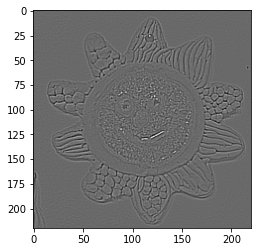

In [122]:
img = image_1c.copy()

kernel = [[-1,-1,-1],
         [-1,8,-1],
         [-1,-1,-1]]

img_out = convolve2d(img, kernel, boundary='symm', mode='same')
print(img_out.shape)
plt.imshow(img_out, cmap='gray')
plt.show()

(220, 220)


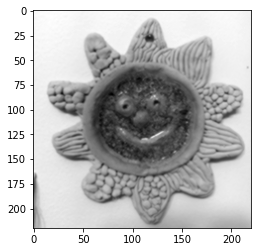

In [117]:
img = image_1c.copy()

kernel = [[1,1,1],
         [1,5,1],
         [1,1,1]]

img_out = convolve2d(img, kernel, boundary='symm', mode='same')
print(img_out.shape)
plt.imshow(img_out, cmap='gray')
plt.show()

In [31]:
#MAXPOOL
img_out = [[740, -179],
          [698, -587]]

np.max(img_out)

740

In [95]:
import numpy as np
np.random.seed(0) 

#Tensorflow
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import mnist

from livelossplot import PlotLossesKeras #<= automatyczne tworzenie krzywej uczenia się

import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


(60000, 28, 28, 1) (10000, 28, 28, 1)


In [97]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_last':
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
else:
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
    
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [98]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

num_classes = 10

# one-hot encoding dla zmiennej docelowej
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [129]:
model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25), 
        
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Flatten(), # spłaszczanie danych, aby połączyć warstwy konwolucyjne z fully connected layers
        
        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_40 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_37 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 dropout_41 (Dropout)        (None, 5, 5, 64)        

In [130]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [131]:
history = model.fit(X_train, y_train,
  batch_size=256, epochs=10,
  verbose=1,
  validation_data=(X_test, y_test)
)

Epoch 1/10
235/235 [==============================] - 20s 82ms/step - loss: 0.2851 - accuracy: 0.9116 - val_loss: 0.0621 - val_accuracy: 0.9809
Epoch 2/10
235/235 [==============================] - 19s 83ms/step - loss: 0.0801 - accuracy: 0.9751 - val_loss: 0.0386 - val_accuracy: 0.9882
Epoch 3/10
235/235 [==============================] - 20s 84ms/step - loss: 0.0610 - accuracy: 0.9809 - val_loss: 0.0303 - val_accuracy: 0.9902
Epoch 4/10
235/235 [==============================] - 20s 84ms/step - loss: 0.0497 - accuracy: 0.9846 - val_loss: 0.0304 - val_accuracy: 0.9897
Epoch 5/10
235/235 [==============================] - 20s 86ms/step - loss: 0.0407 - accuracy: 0.9866 - val_loss: 0.0264 - val_accuracy: 0.9906
Epoch 6/10
235/235 [==============================] - 21s 89ms/step - loss: 0.0358 - accuracy: 0.9887 - val_loss: 0.0222 - val_accuracy: 0.9925
Epoch 7/10
235/235 [==============================] - 20s 86ms/step - loss: 0.0335 - accuracy: 0.9888 - val_loss: 0.0227 - val_accuracy:

In [132]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("CNN Error: %.2f%%" % (100-score[1]*100))

Test loss: 0.023646358400583267
Test accuracy: 0.9921000003814697
CNN Error: 0.79%


In [133]:
def draw_learning_curve(history, key='accuracy', ylim=(0.8, 1.01)):
    plt.figure(figsize=(12,6))
    plt.plot(history.history[key])
    plt.plot(history.history['val_' + key])
    plt.title('Learning Curve')
    plt.ylabel(key.title())
    plt.xlabel('Epoch')
    plt.ylim(ylim)
    ax = plt.gca()
#     ax.spines['bottom'].set_color('white')
#     ax.spines['top'].set_color('white')
#     ax.spines['left'].set_color('white')
#     ax.spines['right'].set_color('white')
#     ax.xaxis.label.set_color('white')
#     ax.yaxis.label.set_color('white')
#     ax.title.set_color('white')
#     ax.tick_params(axis='x', colors='white')
#     ax.tick_params(axis='y', colors='white')
    plt.legend(['train', 'test'], loc='best')
    plt.grid()
    plt.show()

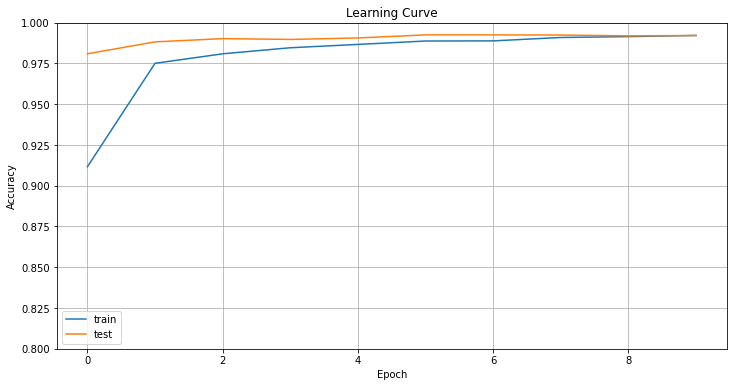

In [135]:
draw_learning_curve(history, 'accuracy', ylim=(0.8, 1.))

In [136]:
model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        Conv2D(32, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25), 
        
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Flatten(), # spłaszczanie danych, aby połączyć warstwy konwolucyjne z fully connected layers
        
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_39 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 dropout_43 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 conv2d_40 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 conv2d_41 (Conv2D)          (None, 8, 8, 64)          36928     
                                                     

In [137]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_39 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 dropout_43 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 conv2d_40 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 conv2d_41 (Conv2D)          (None, 8, 8, 64)          36928     
                                                     

In [ ]:
history = model.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/10
235/235 [==============================] - 44s 184ms/step - loss: 0.3049 - accuracy: 0.9034 - val_loss: 0.0463 - val_accuracy: 0.9842
Epoch 2/10
235/235 [==============================] - 44s 186ms/step - loss: 0.0762 - accuracy: 0.9764 - val_loss: 0.0352 - val_accuracy: 0.9880
Epoch 3/10
235/235 [==============================] - 43s 185ms/step - loss: 0.0539 - accuracy: 0.9840 - val_loss: 0.0254 - val_accuracy: 0.9919
Epoch 4/10
235/235 [==============================] - 43s 181ms/step - loss: 0.0409 - accuracy: 0.9870 - val_loss: 0.0244 - val_accuracy: 0.9919
Epoch 5/10
235/235 [==============================] - 42s 180ms/step - loss: 0.0370 - accuracy: 0.9888 - val_loss: 0.0227 - val_accuracy: 0.9923
Epoch 6/10
235/235 [==============================] - 41s 176ms/step - loss: 0.0306 - accuracy: 0.9905 - val_loss: 0.0188 - val_accuracy: 0.9942
Epoch 7/10
235/235 [==============================] - 42s 179ms/step - loss: 0.0280 - accuracy: 0.9911 - val_loss: 0.0174 - val_ac

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("CNN Error: %.2f%%" % (100-score[1]*100))

In [ ]:
draw_learning_curve(history, 'accuracy', ylim=(0.9, 1.))